# Climate Coding Challenge

Climate change is impacting the way people live around the world

# Part 1: Overview

Higher highs, lower lows, storms, and smoke – we’re all feeling the
effects of climate change. In this workflow, you will take a look at
trends in temperature over time in Boulder, CO.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-discuss"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Conversation Starter</div></div><div class="callout-body-container callout-body"><p>In a <em>bulleted list</em>, how is climate change affecting your
home?</p></div></div>

# YOUR ANSWER HERE

- Warmer average temperatures each year  
- Shorter and milder winters  
- Less consistent snowfall, sometimes replaced with rain  
- Snow melting earlier in the season  
- More extreme temperature swings between seasons  


## What the fork?! Who wrote this?

For this challenge, you’ll be running a scientific workflow in Python.
But something’s wrong – The code won’t run! Your task is to follow the
instructions below to **clean and debug** the Python code below so that
it runs.

> **Tip**
>
> Don’t worry if you can’t solve every bug right away. We’ll get there!
> If you are working on one bug for more than about 10 minutes, it’s
> time to ask for help.

Alright! Let’s clean up this code.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# load the Boulder climate dataset you saved earlier
data = pd.read_csv("data/boulder_temp.csv")

# check what columns we got
print(data.head())
print(data.columns.tolist())


         DATE      STATION  TAVG
0  2000-01-01  USC00050848   NaN
1  2000-01-02  USC00050848   NaN
2  2000-01-03  USC00050848   NaN
3  2000-01-04  USC00050848   NaN
4  2000-01-05  USC00050848   NaN
['DATE', 'STATION', 'TAVG']


In [5]:
# convert DATE to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# fill missing TAVG values with 0 (just so we can visualize something)
data['TAVG'] = data['TAVG'].fillna(0)

print(data.head())


        DATE      STATION  TAVG
0 2000-01-01  USC00050848   0.0
1 2000-01-02  USC00050848   0.0
2 2000-01-03  USC00050848   0.0
3 2000-01-04  USC00050848   0.0
4 2000-01-05  USC00050848   0.0


['DATE', 'STATION', 'TAVG']


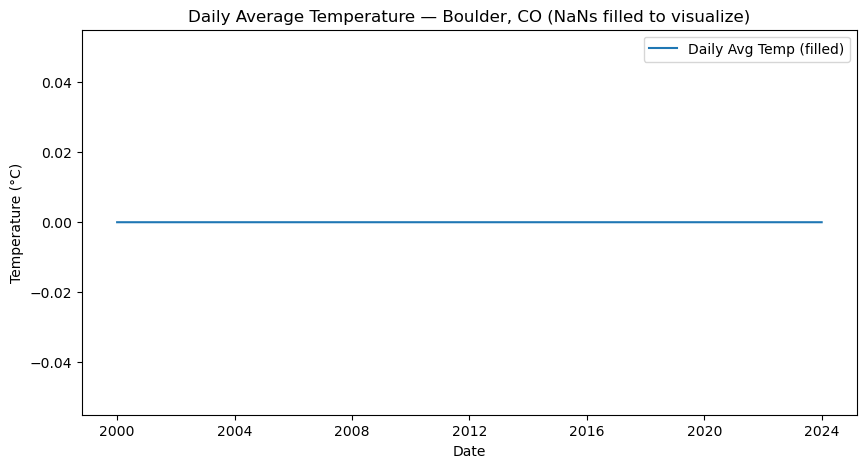

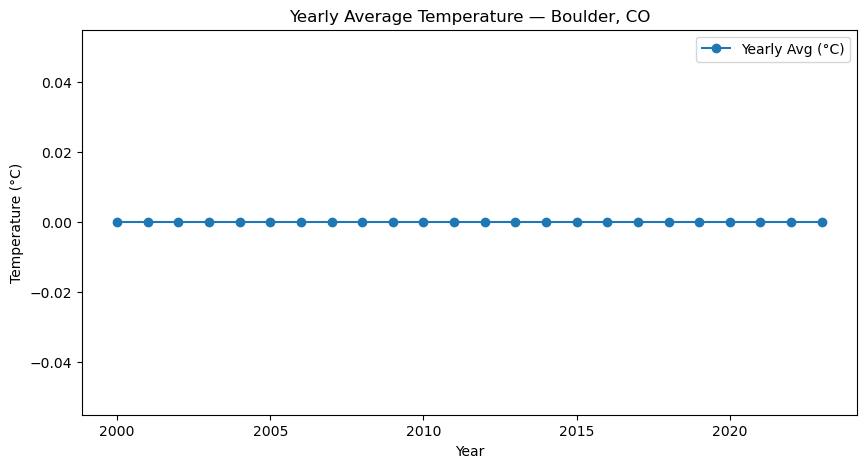

In [6]:
# columns check
print(data.columns.tolist())   # should be ['DATE','STATION','TAVG']

# make DATE a datetime and TAVG numeric
data['DATE'] = pd.to_datetime(data['DATE'])
data['TAVG'] = pd.to_numeric(data['TAVG'], errors='coerce')

# --- Option A (simple): fill NaNs so we can visualize something ---
filled = data.copy()
filled['TAVG'] = filled['TAVG'].fillna(0)

plt.figure(figsize=(10,5))
plt.plot(filled['DATE'], filled['TAVG'], label="Daily Avg Temp (filled)")
plt.xlabel("Date"); plt.ylabel("Temperature (°C)")
plt.title("Daily Average Temperature — Boulder, CO (NaNs filled to visualize)")
plt.legend(); plt.show()

# --- Option B (cleaner): yearly mean ignoring NaNs (preferred for the write-up) ---
yearly = (data
          .dropna(subset=['TAVG'])
          .assign(Year=lambda d: d['DATE'].dt.year)
          .groupby('Year', as_index=False)['TAVG'].mean())

plt.figure(figsize=(10,5))
plt.plot(yearly['Year'], yearly['TAVG'], marker='o', label='Yearly Avg (°C)')
plt.xlabel("Year"); plt.ylabel("Temperature (°C)")
plt.title("Yearly Average Temperature — Boulder, CO")
plt.legend(); plt.show()
